# How to use `custom_filter`?

As the basic `Pyrosm` tutorial showed, it is often possible to customize the calls using a specific `custom_filter` parameter. This parameter is available for all methods. 

The `custom_filter` can be highly useful if you want to parse only certain type of Open Street Map elements from the PBF, such as "residential" buildings or only certain type of shops such as "book" -shops. 

## Constructing the `custom_filter`

Before diving into documentation about how to construct a custom filter, it is good to understand a bit how OpenStreetMap data is constructed. OpenStreetMap represents: 

>_"physical features on the ground (e.g., roads or buildings) using **tags** attached to its basic data structures (its nodes, ways, and relations). Each tag describes a geographic attribute of the feature being shown by that specific node, way or relation"_ ([OSM Wiki, 2020](https://wiki.openstreetmap.org/wiki/Map_Features)). 

What `Pyrosm` does behind the scenes, is going through these tags and filtering OSM data elements according specific predefined criteria that makes it possible to parse e.g. only buildings from the data. `custom_filter` can be used to modify this process. 

There are certain rules that comes to constructing the `custom_filter`. The filter should always be a **Python dictionary** where the `key` should be a string and the `value` should be a list of OSM tag-values matching the criteria defined by the user. The `key` should correspond to the key in OpenStreetMap tags (e.g. "building") and the value-list should correspond the OSM values that are associated with the keys. You can see a long list of possible OSM keys and associated values from [OSM Map Features](https://wiki.openstreetmap.org/wiki/Map_Features) wiki page.

As an example, a filter can look something like the one below which would parse all residential and retail buildings from the data:

  - `{"building": ["residential", "retail"]}`
  
This `custom_filter` can be used with `get_buildings()` or `get_osm_by_custom_criteria()` -function. With any other function, this filter does not have any effect on the results, as `"building"` tag is only associated with physical features representing buildings. Hence, if you would use this filter e.g. when parsing roads with `get_network()`, it wouldn't do anything because none of the roads have a tag "building".   

Let's test:

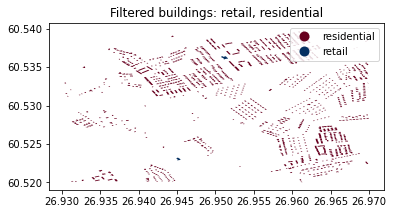

In [1]:
from pyrosm import OSM, get_path
# Get test data 
fp = get_path("test_pbf")

# Initialize the reader
osm = OSM(fp)

# Read buildings with custom filter
my_filter = {"building": ["residential", "retail"]}
buildings = osm.get_buildings(custom_filter=my_filter)

# Plot
title = "Filtered buildings: " + ", ".join(buildings["building"].unique())
ax = buildings.plot(column="building", cmap="RdBu", legend=True)
ax.set_title(title);

As we can see, as a result the data now only includes buildings that have `residential` or `retail` as a value for the key "building". 

### Using `True` as value to include all tags associated with specific OSM key  

In some cases, such as when parsing Points of Interest (POI) from the PBF, it might be useful to e.g. parse all OSM features that are [shops](https://wiki.openstreetmap.org/wiki/Key:shop). If you do **not** want to specify *what kind* shops to parse from the PBF (i.e. **include all**), it is possible to add `True` as a value in the `custom_filter`. 

For example a filter: 

 - `custom_filter={"shop": True}`
 
would include all shops when parsing the OSM data with `get_pois()`. 

Let's test:

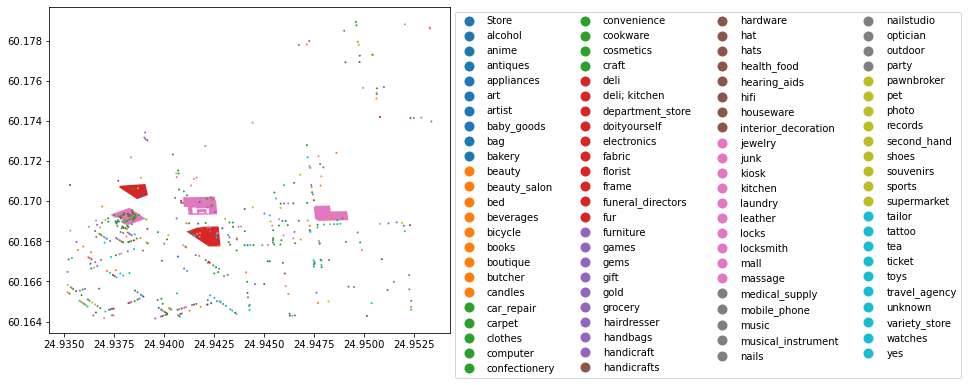

In [2]:
from pyrosm import OSM, get_path
# Get test data 
fp = get_path("helsinki_pbf")

# Initialize the reader
osm = OSM(fp)

# Read POIs with custom filter
my_filter = {"shop": True}
            
pois = osm.get_pois(custom_filter=my_filter)

# Plot
ax = pois.plot(column="shop", legend=True, markersize=1, figsize=(14,6), legend_kwds=dict(loc='upper left', ncol=4, bbox_to_anchor=(1, 1)))